In [11]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Read the csv file into a pandas DataFrame

car = pd.read_csv('/Users/stacygiauque/Desktop/Columbia_Data_Analytics_Bootcamp/Final Project/data.csv')
car.head()

,year,hp,cylinders,doors,mpg_highway,mpg_city,popularity,msrp,make,model,fuel_type,transmission,drive,market_category,size,style
0,2004,140,4,2,33,23,1385,10135,Chevrolet,Cavalier,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
1,2003,108,4,2,38,30,2031,10245,Toyota,ECHO,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
2,2001,79,4,2,38,31,481,10299,Suzuki,Swift,regular unleaded,MANUAL,front wheel drive,Hatchback,Compact,2dr Hatchback
3,2005,140,4,2,33,23,1385,10325,Chevrolet,Cavalier,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
4,2004,108,4,2,38,30,2031,10355,Toyota,ECHO,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe


In [13]:
# Assign the data to X and y
X = car[["year", "hp", "cylinders", "doors", "mpg_highway", "mpg_city", "popularity"]]
y = car["msrp"].values.reshape(-1, 1)
print(X.shape, y.shape)

(10195, 7) (10195, 1)


In [14]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

X_train.head()


,year,hp,cylinders,doors,mpg_highway,mpg_city,popularity
1582,2015,132,4,3,36,27,1439
3837,2009,212,4,4,23,16,586
2175,2004,185,6,4,21,16,481
5076,2015,200,4,4,29,20,3105
2540,2003,244,6,4,25,17,1851


In [15]:
# Scale Data

### BEGIN SOLUTION

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### END SOLUTION


In [16]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

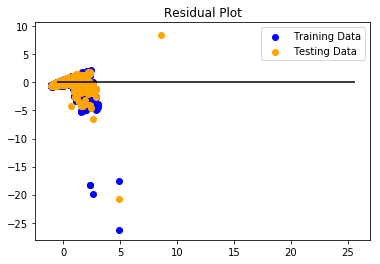

In [17]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION


In [18]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.42692537115048407, R2: 0.44558500814351354


In [19]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.4171712962896298, R2: 0.45825187148774416


In [20]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.42692440335470816, R2: 0.4455862649451081


In [21]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.4189336132766099, R2: 0.4559632865874086
